# The Critics Critique Results Analysis

## 0. import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_rows = 4000

## 1. Import Data

In [3]:
scored_texts = pd.read_csv('../data/scored_texts.csv')

In [15]:
scored_texts.head()

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[{'label': '3 stars', 'score': 0.4069659113883...",3.17,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[{'label': '4 stars', 'score': 0.4059227108955...",4.00,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 XBO NSW,Hablar de Telling Lies es un poco complicado. ...,8.0,"[{'label': '3 stars', 'score': 0.4342378377914...",3.62,'4 starts',4.00
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 XBO,Titanfall recibe el último contenido descargab...,7.0,"[{'label': '3 stars', 'score': 0.4690837860107...",3.40,'4 starts',3.50
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC OSX IPH IPD AND,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[{'label': '4 stars', 'score': 0.4857680797576...",3.08,'3 starts',3.40


## 2. Data Exploration

In [4]:
scored_texts['platform'] = scored_texts['platform'].replace({'Xbox 360': '360',
                                             'XOne': 'Xbox One', 
                                             'iOS': 'iPhone', 
                                             '3DS': 'Nintendo 3DS', 
                                             'WiiU': 'Wii U',
                                             'Nintendo Switch': 'Nintendo Switch',
                                             '\xa0· ': '',
                                             'X360': '360',
                                             'XBO': 'Xbox One', 
                                             'IPH': 'iPhone', 
                                             'IPD': 'iPad', 
                                             'AND': 'Android', 
                                             'WiiU': 'Wii U', 
                                             'NSW': 'Switch',
                                             'PSV': 'Vita',
                                             'GB': 'Game Boy',
                                             'STD': 'Stadia',
                                             'OSX': 'Mac',
                                             'PSVITA': 'Vita',
                                             'NDS': 'DS',
                                             'Ipad': 'iPad', 
                                             'Nintendo DS': 'DS',             
                                             'Móviles': 'Android'               
                                              }, regex=True)

In [5]:
scored_texts['game'].replace({' - Análisis': '', 'Análisis de ': ''}, regex=True, inplace=True)

In [6]:
scored_texts['author'] = scored_texts['author'].replace({'(\D+)\\n': '', '(\D+) - @': ''}, regex=True)

In [7]:
#Counting games per platform: Nintendo Switch - 3819, PS4 - 5589, Xbox One - 4276, PS3 - 3772, Nintendo 3DS - 1196, Xbox 360 - 3520, PC - 8511, Android - 1071 y iPhone - 1847

#scored_texts[scored_texts['platform'].str.contains("Xbox")].value_counts()

In [10]:
scored_texts['company'] = scored_texts['company'].replace({'Bandai Namco Entertainment': 'Bandai Namco', 
                                                           'Sony Computer Entertainment': 'Sony',
                                                           'Xbox Game Studios': 'Microsoft',
                                                           'Namco Bandai': 'Bandai Namco',
                                                           'Electronic Arts': 'EA',
                                                           'EA Sports': 'EA',
                                                           'THQ Nordic': 'THQ',
                                                           'Nordic Games': 'THQ',
                                                           'Microsoft Game Studios': 'Microsoft',
                                                           'Microsoft Studios': 'Microsoft',
                                                           'Warner Bros. Interactive Entertainment': 'Warner Bros.',
                                                           'Bethesda Softworks': 'Bethesda',
                                                           'Team 17': 'Team17',
                                                           'Blizzard Entertainment': 'Blizzard',
                                                           '2K Games': 'Take-Two Interactive',
                                                           '2K Sports': 'Take-Two Interactive',
                                                           '2K': 'Take-Two Interactive',
                                                           'Sony Interactive Entertainment': 'Sony',
                                                           'Sony Europe': 'Sony',
                                                           'Square-Enix': 'Square Enix',
                                                           'Koch Media': 'Deep Silver',
                                                           'Tecmo Koei': 'KoeTec',
                                                           'Koei Tecmo': 'KoeTec',
                                                           'Koei': 'KoeTec',
                                                           'Tecmo':'KoeTec',
                                                           'Tecmo Koei Europe': 'KoeTec',
                                                           'Tecmo': 'KoeTec',
                                                           'The Pokémon Company': 'Nintendo',
                                                           'Rockstar Games': 'Rockstar',
                                                           'Nacon': 'Bigben Interactive',
                                                           'Sega': 'SEGA',
                                                           'Private Division': 'Take-Two Interactive',
                                                           'Take 2': 'Take-Two Interactive'
                                                           
                                                          }, regex=True)

In [19]:
scored_texts

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[{'label': '3 stars', 'score': 0.4069659113883...",3.17,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,Nintendo 3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[{'label': '4 stars', 'score': 0.4059227108955...",4.00,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 Xbox One Switch,Hablar de Telling Lies es un poco complicado. ...,8.0,"[{'label': '3 stars', 'score': 0.4342378377914...",3.62,'4 starts',4.00
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 Xbox One,Titanfall recibe el último contenido descargab...,7.0,"[{'label': '3 stars', 'score': 0.4690837860107...",3.40,'4 starts',3.50
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC Mac iPhone iPad Android,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[{'label': '4 stars', 'score': 0.4857680797576...",3.08,'3 starts',3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,meristation,https://as.com/meristation/2009/02/23/analisis...,Pablo González,Eledees: The Adventures of Kai and Zero,None,Puzzle,DS,Konami fue una compañía bastante inteligente c...,7.5,"[{'label': '3 stars', 'score': 0.3707822263240...",3.57,'4 starts',3.75
15547,Vandal,https://vandal.elespanol.com/analisis/switch/t...,Sergio Martín,The Stretchers,Nintendo,Puzle,Switch,"El equipo de Tarsier Studios, responsables ent...",7.7,"[{'label': '3 stars', 'score': 0.3597940206527...",3.25,'4 starts',3.85
15548,3D Juegos,https://www.3djuegos.com/juegos/analisis/3486/...,Jesús Bella,Deadly Creatures,None,None,Wii,Si estás harto de ponerte siempre del lado de ...,8.0,"[{'label': '3 stars', 'score': 0.4155605137348...",3.50,'4 starts',4.00
15549,3D Juegos,https://www.3djuegos.com/juegos/analisis/11213...,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi,None,None,PS3 360,Namco Bandai y Spike vuelven a la carga con la...,7.0,"[{'label': '4 stars', 'score': 0.4572119116783...",4.00,'4 starts',3.50


In [ ]:
Acti_blizzard_list = scored_texts[scored_texts['company'].str.contains('Activision Blizzard')].index.to_list()

### Drop reviews with score < 2

In [16]:
min_score_filter = scored_texts['score'] < 2

In [17]:
scored_texts.drop(scored_texts[min_score_filter].index, inplace = True) 

In [18]:
scored_texts[scored_texts['score'] < 2]

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj


In [20]:
#scored_texts.to_csv('../data/scored_texts_final.csv', index=False)

## 3. Data Analysis by Site

### 3.1 Score Deviation per Site
As the difference in percentage between adjusted score and computed score.

In [3]:
scored_texts_analytics = pd.read_csv('../data/scored_texts_analytics.csv')

In [4]:
scored_texts_analytics

,site,author,game,score,score_adj,stars_mean,company,platform,genre,score_deviation
0,meristation,Javier de Pascual,Metal Gear Solid Mobile,8.5,4.25,3.17,Konami,NGE,"Acción, Tactical",-25.411765
1,meristation,Pablo González,THE DENPA MEN: They Came By Wave,7.2,3.60,4.00,None,Nintendo 3DS,RPG,11.111111
2,meristation,David Arroyo,Telling Lies,8.0,4.00,3.62,Annapurna Interactive,PC PS4 Xbox One Switch,Aventura,-9.500000
3,meristation,Salva Fernàndez,Titanfall: IMC Rising,7.0,3.50,3.40,None,PC 360 Xbox One,"Acción, First Person Shooter",-2.857143
4,meristation,None,Moebius: Empire Rising,6.8,3.40,3.08,None,PC Mac iPhone iPad Android,Aventura Gráfica,-9.411765
...,...,...,...,...,...,...,...,...,...,...
15533,meristation,Pablo González,Eledees: The Adventures of Kai and Zero,7.5,3.75,3.57,None,DS,Puzzle,-4.800000
15534,Vandal,Sergio Martín,The Stretchers,7.7,3.85,3.25,Nintendo,Switch,Puzle,-15.584416
15535,3D Juegos,Jesús Bella,Deadly Creatures,8.0,4.00,3.50,None,Wii,None,-12.500000
15536,3D Juegos,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi,7.0,3.50,4.00,None,PS3 360,None,14.285714


In [5]:
#scored_texts_analytics = scored_texts_analytics[['site', 'author', 'game', 'score', 'score_adj', 'stars_mean', 'company', 'platform', 'genre']]

In [6]:
#scored_texts_analytics.to_csv('../data/scored_texts_analytics.csv', index=False)

In [4]:
#scored_texts_analytics['score_deviation'] = (scored_texts_analytics['stars_mean'] - scored_texts_analytics['score_adj']) / scored_texts_analytics['score_adj'] * 100

In [6]:
scored_texts_analytics.groupby('site')['score_deviation'].mean()

site
3D Juegos     -5.435291
Gamereactor   -5.286295
Vandal        -4.516404
meristation   -3.674755
revogamers     0.666360
Name: score_deviation, dtype: float64

['meristation', 'Vandal', 'revogamers', 'Gamereactor', '3D Juegos']

### 3.2 Plot Score Deviation

NameError: name 'df' is not defined

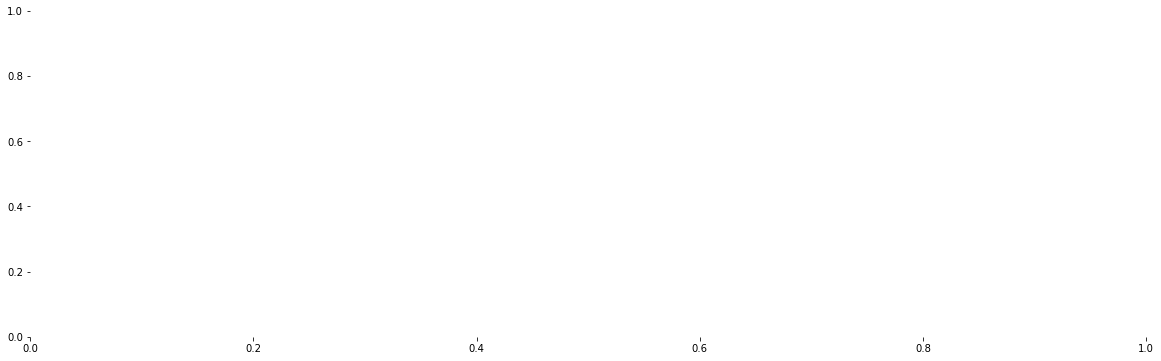

In [44]:
sites_list = list(scored_texts_analytics['site'].unique())

#for site in sites_list:

    fig, ax = plt.subplots(figsize=(20,6))

    sns.despine(bottom=True, left=True)
    sns.pointplot(x="site", y="score_deviation", data=df, join=False, palette="dark", markers="d")

    sns.stripplot(x="site", y="score_deviation", hue="score",
                  data=df, dodge=True, alpha=.5, zorder=0.5)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::10], labels[::10], title="Score Deviation(%) per site", title_fontsize=14, frameon=True, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
               ncol=20, mode="expand", borderaxespad=0., fontsize=8)
    plt.show()

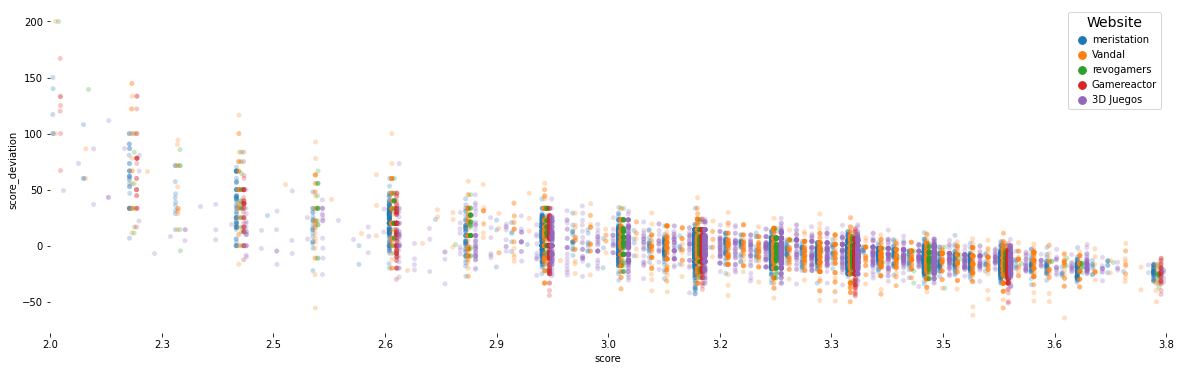

In [45]:
fig, ax = plt.subplots(figsize=(20,6))

sns.despine(bottom=True, left=True)
sns.stripplot(x="score", y="score_deviation", hue="site",
              data=scored_texts_analytics, dodge=True, alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:], title="Website", title_fontsize=14,
          handletextpad=0, columnspacing=1,
          loc="best", ncol=1, frameon=True)
ax.xaxis.set_major_locator(plt.LinearLocator())
plt.show()

### 3.3 Site Tops

In [27]:
scored_texts_analytics.groupby('site')['score'].mean()

site
3D Juegos      7.613345
Gamereactor    7.438635
Vandal         7.607977
meristation    7.456373
revogamers     7.210833
Name: score, dtype: float64

In [32]:
#Plotear

#scored_texts_analytics.groupby('site')['score'].value_counts()

In [33]:
scored_texts_analytics.groupby('site')['stars_mean'].mean()

site
3D Juegos      3.564439
Gamereactor    3.438378
Vandal         3.567523
meristation    3.522975
revogamers     3.546580
Name: stars_mean, dtype: float64

## 4. Data Analysis by Company

### 4.1 Score Deviation per Top Companies

In [81]:
#scored_texts['company'].value_counts().head(75)

In [84]:
q_companies_filter = scored_texts_analytics.groupby('company').filter(lambda x: len(x) >= 20)

In [85]:
q_companies = q_companies_filter.groupby('company')['score_deviation'].mean()

In [94]:
q_companies.sort_values(ascending=False).head(10)

company
Ratalaika Games       14.548144
Atari                 10.026678
Bigben Interactive     5.197232
D3 Publisher           4.834162
Microids               3.582731
Milestone              2.236477
Curve Digital          1.616641
Rising Star Games      0.742658
Gameloft               0.188556
Kalypso Media         -0.882083
Name: score_deviation, dtype: float64

In [122]:
count_companies = q_companies_filter.groupby('company')[['game']].count().reset_index()

In [137]:
q_companies_filter.groupby('company')[['score_deviation', 'score']].mean().reset_index()

,company,score_deviation,score
0,505 Games,-0.896789,7.080000
1,Activision,-3.252107,7.449425
2,Annapurna Interactive,-9.281125,8.378261
3,Arc System Works,-7.403412,7.827586
4,Atari,10.026678,6.615000
5,Atlus,-7.306968,8.084722
6,Bandai Namco,-1.841226,7.332208
7,Bethesda,-5.895799,7.679675
8,Bigben Interactive,5.197232,6.468421
9,Blizzard,-11.019936,8.400000


In [127]:
companies_df = pd.merge(count_companies, s_companies, on="company")

In [134]:
companies_df.drop(companies_df[companies_df['company'] == 'None'].index, inplace = True) 

In [141]:
'''fig, ax = plt.subplots(figsize=(20,6))

sns.despine(bottom=True, left=True)
sns.stripplot(x="score", y="score_deviation", hue="company",
              data=s_companies, dodge=True, alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title="Website", title_fontsize=14,
          handletextpad=0, columnspacing=1,
          loc="best", ncol=20, frameon=True)
ax.xaxis.set_major_locator(plt.LinearLocator())
ax.set_xlim([0, roundup(y_max)])
plt.show()'''

#Deprecated

'fig, ax = plt.subplots(figsize=(20,6))\n\nsns.despine(bottom=True, left=True)\nsns.stripplot(x="score", y="score_deviation", hue="company",\n              data=s_companies, dodge=True, alpha=.25, zorder=1)\n\nhandles, labels = ax.get_legend_handles_labels()\nax.legend(handles[:5], labels[:5], title="Website", title_fontsize=14,\n          handletextpad=0, columnspacing=1,\n          loc="best", ncol=20, frameon=True)\nax.xaxis.set_major_locator(plt.LinearLocator())\nax.set_xlim([0, roundup(y_max)])\nplt.show()'

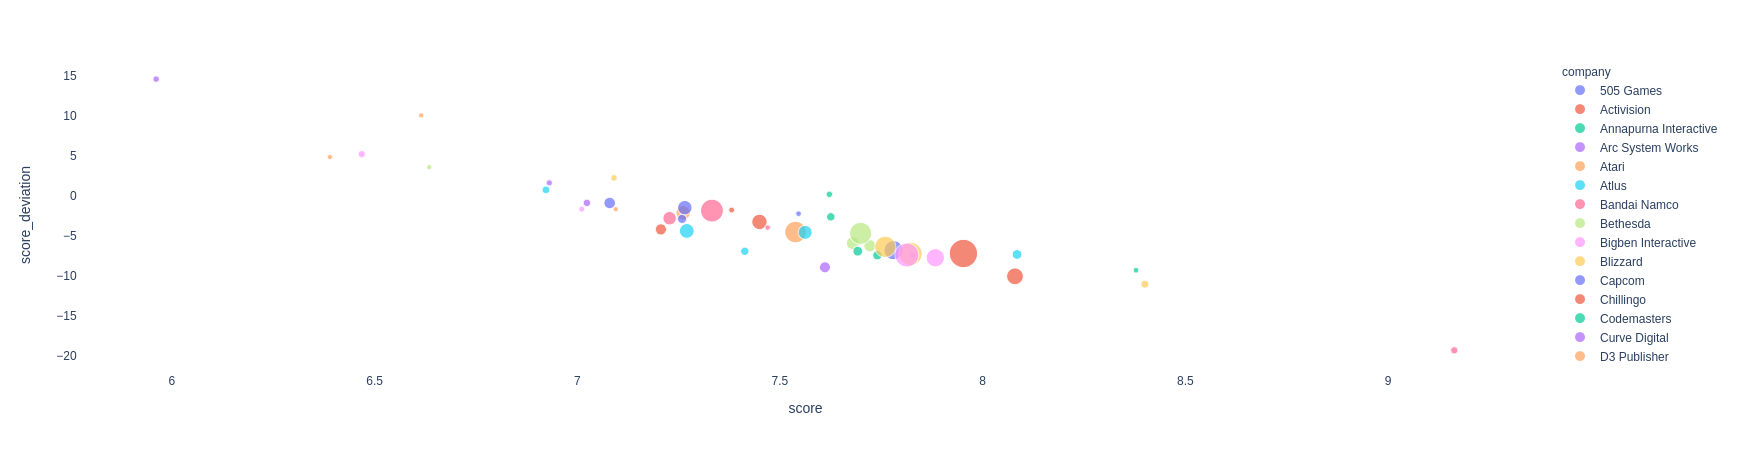

In [135]:
#size='petal_length', hover_data=['petal_width']
fig = px.scatter(companies_df, x="score", y="score_deviation", color="company", size='game')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [68]:
scored_texts_analytics.sort_values(['score_deviation'],ascending=False).groupby('company').head(3)

,site,author,game,score,score_adj,score_label,stars_mean,company,platform,genre,score_deviation
1917,Vandal,Fran G. Matas,Song of Horror,6.9,3.45,'3 starts',2.86,ðŸš€ Raiser Games,PC Xbox One PS4,Aventura Terror,-17.101449
10013,revogamers,Javier Aranda,City of Brass,6.5,3.25,'3 starts',3.67,Úppercut Games,Nintendo Switch,Acción,12.923077
12017,Vandal,Ramón Nafria,Arrest of a stone Buddha,7.0,3.50,'4 starts',3.20,yeo,PC Switch,Aventura de acción,-8.571429
6985,Vandal,Alberto González,Monument Valley 2,9.5,4.75,'5 starts',3.83,ustwo Games,iPhone Android,Puzle,-19.368421
5326,Vandal,Alberto González,Monument Valley,9.5,4.75,'5 starts',3.00,ustwo,iPhone Android,Puzle,-36.842105
...,...,...,...,...,...,...,...,...,...,...,...
11490,meristation,Cristian Ciuraneta,World of Goo,9.0,4.50,'4 starts',4.67,2D Boy,Android iPad iPhone,Puzzle,3.777778
14267,meristation,None,Men of War: Assault Squad,8.0,4.00,'4 starts',4.11,1C Company,PC,"Strategy, Real-Time",2.750000
7769,meristation,None,Theatre of War 2: Africa 1943,7.0,3.50,'4 starts',3.92,1C Company,PC,"Strategy, Real-Time",12.000000
15084,Vandal,Ramón Varela,Beat Cop,6.8,3.40,'3 starts',2.60,11 bit studios,PC Android Switch Xbox One PS4,Aventura narrativa,-23.529412


In [73]:
scored_texts_analytics.groupby('company')['score_deviation'].mean().sort_values(ascending=False).head(10)

company
Funbox Media          200.000000
Creashock Studios     200.000000
Punchers Impact       144.666667
The Fun Pimps         144.666667
stillalive studios    122.000000
GameMill              122.000000
IDC/Games             108.000000
Freedom Factory       100.000000
Microprose            100.000000
VectorCell            100.000000
Name: score_deviation, dtype: float64

## 5. Data Analysis by Genre

In [100]:
#Totally unuseful because there is a mix
#scored_texts_analytics.groupby('genre')['score_deviation'].min().sort_values(ascending=False).head(50)

In [103]:
aventura = scored_texts_analytics[scored_texts_analytics['genre'].str.contains('Aventura')]

In [1]:
#aventura.groupby('s')['score_deviation'].min().sort_values(ascending=True).head(50)

## 6. Data Analysis by Author

In [29]:
#q_authors = scored_texts_analytics['author'].value_counts()[scored_texts_analytics['author'].value_counts() >= 3]

In [37]:
q_authors_filter = scored_texts_analytics.groupby('author').filter(lambda x: len(x) >= 3)

In [38]:
q_authors = q_authors_filter.groupby('author')['score_deviation'].mean()

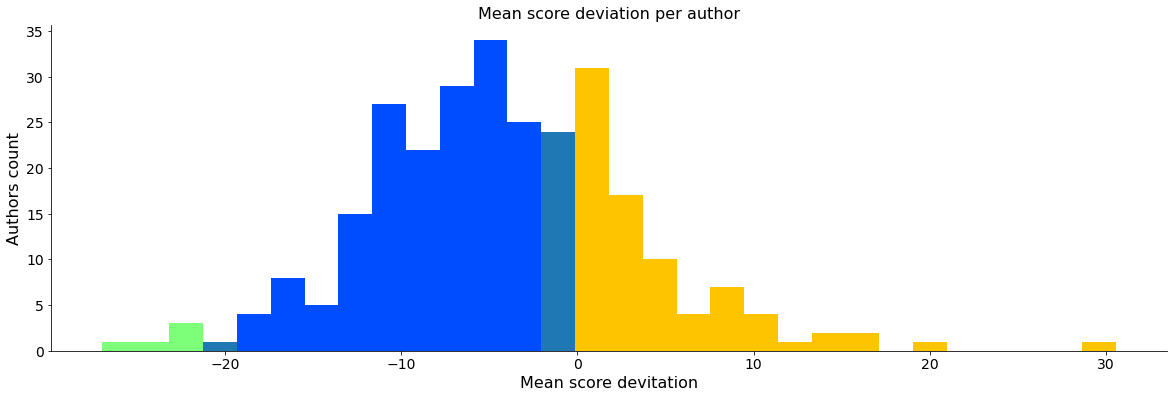

In [83]:
fig, ax = plt.subplots(figsize=(20,6))  

N, bins, patches = plt.hist(q_authors, 30)

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)

for i in range(0,3):
    patches[i].set_facecolor(low)
for i in range(4,13):
    patches[i].set_facecolor(medium)
for i in range(14,30):
    patches[i].set_facecolor(high)

plt.xlabel("Mean score devitation", fontsize=16)  
plt.ylabel("Authors count", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title('Mean score deviation per author', fontsize=16)


ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

In [6]:
print(f"Nota media de Sergio {scored_texts_analytics[scored_texts_analytics['author'].str.contains('Sergio Figueroa')]['score'].mean()}, David: {scored_texts_analytics[scored_texts_analytics['author'].str.contains('David Caballero')]['score'].mean()} y Juan: {scored_texts_analytics[scored_texts_analytics['author'].str.contains('Juan A. Fonseca')]['score'].mean()}")

Nota media de Sergio 7.223880597014926, David: 7.67479674796748 y Juan: 8.007352941176471


In [ ]:
scored_texts_analytics[scored_texts_analytics['author'].str.contains(author)]['score'].mean()

## 7. Data Analysis by platform
First, group by platforms because there are a lot of different groups not matching directly in group by

In [161]:
switch_df = scored_texts_analytics[scored_texts_analytics['platform'].str.contains("Switch")]

In [219]:
switch_plot = switch_df[['score','stars_mean']].mean()

In [248]:
df1

,score,mean
PS4,2,3
xbox,2,5


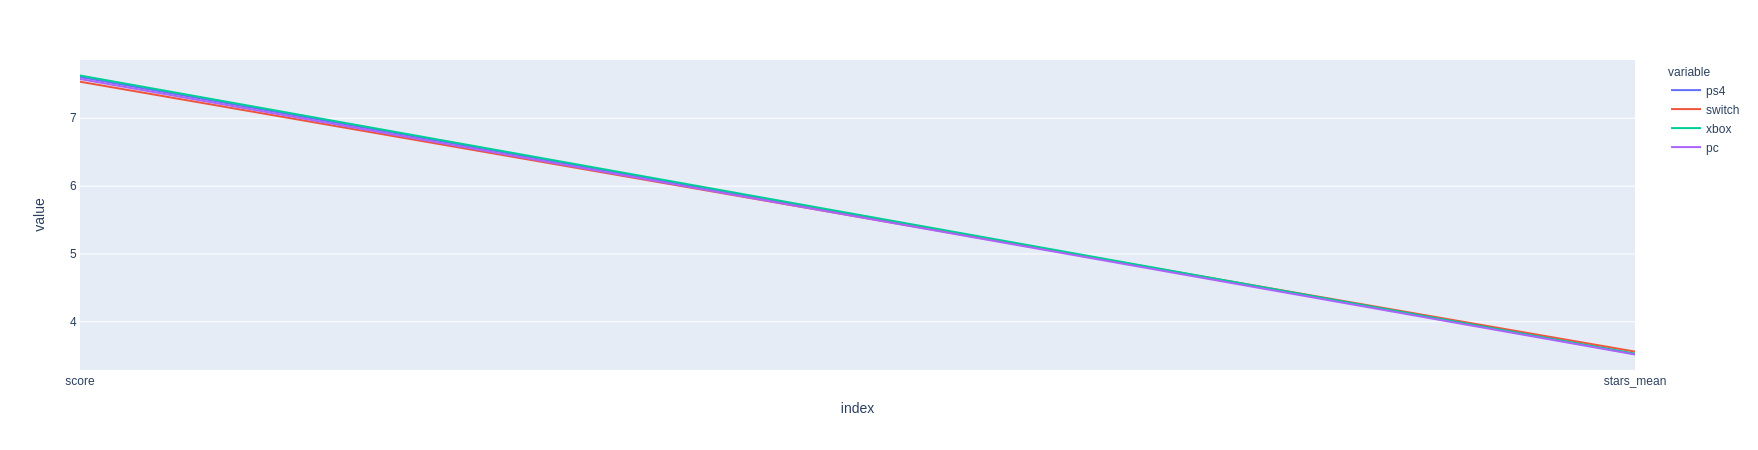

In [269]:
fig = px.line(platform_plot)
fig

In [267]:
platform_plot = ps4_plot.to_frame(name='ps4').join(switch_plot.to_frame(name='switch')).join(xbox_plot.to_frame(name='xbox')).join(pc_plot.to_frame(name='pc'))

In [162]:
ps4_df = scored_texts_analytics[scored_texts_analytics['platform'].str.contains("PS4")]

In [256]:
ps4_plot = ps4_df[['score','stars_mean']].mean()

In [264]:
xbox_df = scored_texts_analytics[scored_texts_analytics['platform'].str.contains("Xbox One")]

In [265]:
xbox_plot = xbox_df[['score','stars_mean']].mean()

In [164]:
pc_df = scored_texts_analytics[scored_texts_analytics['platform'].str.contains("PC")]

In [266]:
pc_plot = pc_df[['score','stars_mean']].mean()

In [147]:
scored_texts_analytics['platform'].unique()

array(['NGE', 'Nintendo 3DS', 'PC PS4 Xbox One Switch', ...,
       'PC VitaITA PS4 iPhone', ' iPhone, iPhone', 'PC Wii U Mac iPhone'],
      dtype=object)

In [160]:
scored_texts_analytics

,site,author,game,score,score_adj,stars_mean,company,platform,genre,score_deviation
0,meristation,Javier de Pascual,Metal Gear Solid Mobile,8.5,4.25,3.17,Konami,NGE,"Acción, Tactical",-25.411765
1,meristation,Pablo González,THE DENPA MEN: They Came By Wave,7.2,3.60,4.00,None,Nintendo 3DS,RPG,11.111111
2,meristation,David Arroyo,Telling Lies,8.0,4.00,3.62,Annapurna Interactive,PC PS4 Xbox One Switch,Aventura,-9.500000
3,meristation,Salva Fernàndez,Titanfall: IMC Rising,7.0,3.50,3.40,None,PC 360 Xbox One,"Acción, First Person Shooter",-2.857143
4,meristation,None,Moebius: Empire Rising,6.8,3.40,3.08,None,PC Mac iPhone iPad Android,Aventura Gráfica,-9.411765
...,...,...,...,...,...,...,...,...,...,...
15533,meristation,Pablo González,Eledees: The Adventures of Kai and Zero,7.5,3.75,3.57,None,DS,Puzzle,-4.800000
15534,Vandal,Sergio Martín,The Stretchers,7.7,3.85,3.25,Nintendo,Switch,Puzle,-15.584416
15535,3D Juegos,Jesús Bella,Deadly Creatures,8.0,4.00,3.50,None,Wii,None,-12.500000
15536,3D Juegos,Sergio Martín,Dragon Ball Z Ultimate Tenkaichi,7.0,3.50,4.00,None,PS3 360,None,14.285714
